# **Imports**

In [10]:
import os
from PIL import Image
import shutil
import matplotlib.pyplot as plt

# **Extract Data**

In [5]:
data = {
    "model": [],
    "count": []
    }



In [6]:
def gather_images(source_folder, destination_folder):
    # create destination folder
    os.makedirs(destination_folder, exist_ok=True)

    for make in os.listdir(source_folder):
        print(f"Starting {make} ...")
        make_path = os.path.join(source_folder, make)
        if os.path.isdir(make_path):
            # iterate through makes
            for series in os.listdir(make_path):
                series_count = 0
                data["model"].append(f"{make}-{series}")
                series_path = os.path.join(make_path, series)
                # iterate through serieses
                if os.path.isdir(series_path):
                    for year in os.listdir(series_path):
                        year_path = os.path.join(series_path, year)
                        # iterate through years
                        if os.path.isdir(year_path):    
                            for color in os.listdir(year_path):
                                color_path = os.path.join(year_path, color)
                                # iterate through colors
                                if os.path.isdir(color_path):
                                    for file in os.listdir(color_path):
                                        series_count +=1
                                        # add images to destination folder
                                        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                                            try:
                                                img_path = os.path.join(color_path, file)
                                                img = Image.open(img_path)
                                                img.verify()

                                                shutil.copy(img_path, destination_folder)
                                            except (IOError, SyntaxError) as e:
                                                print(f"Datei {file} ist kein gültiges Bild und wird übersprungen.")
                                else:
                                    print("errror")

                data["count"].append(series_count)
        else:
            print(f"dir not found {make_path}")
        
        print(f"Finished {make}!")

source_folder = '../src/data/dvm-car-models/makes'  
destination_folder = '../src/extracted_data'  

gather_images(source_folder, destination_folder)

Starting BMW ...
Finished BMW!
Starting Daimler ...
Finished Daimler!
Starting Mercedes-Benz ...
Finished Mercedes-Benz!
Starting Porsche ...
Finished Porsche!
Starting Volkswagen ...
Finished Volkswagen!


In [7]:
folder_path = '../src/extracted_data'

image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')

image_count = 0

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(image_extensions):
            image_count += 1

print(f'Total number of images: {image_count}')

Total number of images: 280898


In [9]:
print(data)

{'model': ['BMW-1 Series', 'BMW-2 Series', 'BMW-2 Series Active Tourer', 'BMW-2 Series Gran Tourer', 'BMW-3 Series', 'BMW-3 Series Gran Turismo', 'BMW-4 Series', 'BMW-4 Series Gran Coupe', 'BMW-5 Series', 'BMW-5 Series Gran Turismo', 'BMW-6 Series', 'BMW-6 Series Gran Coupe', 'BMW-6 Series Gran Turismo', 'BMW-7 Series', 'BMW-Alpina B10', 'BMW-Alpina D3', 'BMW-Alpina D3 Bi-Turbo', 'BMW-Alpina D4', 'BMW-Alpina D5 Bi-Turbo', 'BMW-Alpina Roadster', 'BMW-Alpina Unspecified Models', 'BMW-i3', 'BMW-i8', 'BMW-M2', 'BMW-M3', 'BMW-M4', 'BMW-M5', 'BMW-M6', 'BMW-M6 Gran Coupe', 'BMW-X1', 'BMW-X2', 'BMW-X3', 'BMW-X4', 'BMW-X5', 'BMW-X5M', 'BMW-X6', 'BMW-X6M', 'BMW-Z3', 'BMW-Z3M', 'BMW-Z4', 'BMW-Z4M', 'BMW-Z8', 'Daimler-XJ Series', 'Mercedes-Benz-200', 'Mercedes-Benz-220', 'Mercedes-Benz-230', 'Mercedes-Benz-320', 'Mercedes-Benz-350', 'Mercedes-Benz-500', 'Mercedes-Benz-A Class', 'Mercedes-Benz-AMG', 'Mercedes-Benz-Amg Gt', 'Mercedes-Benz-B Class', 'Mercedes-Benz-C Class', 'Mercedes-Benz-Citan', 'Me

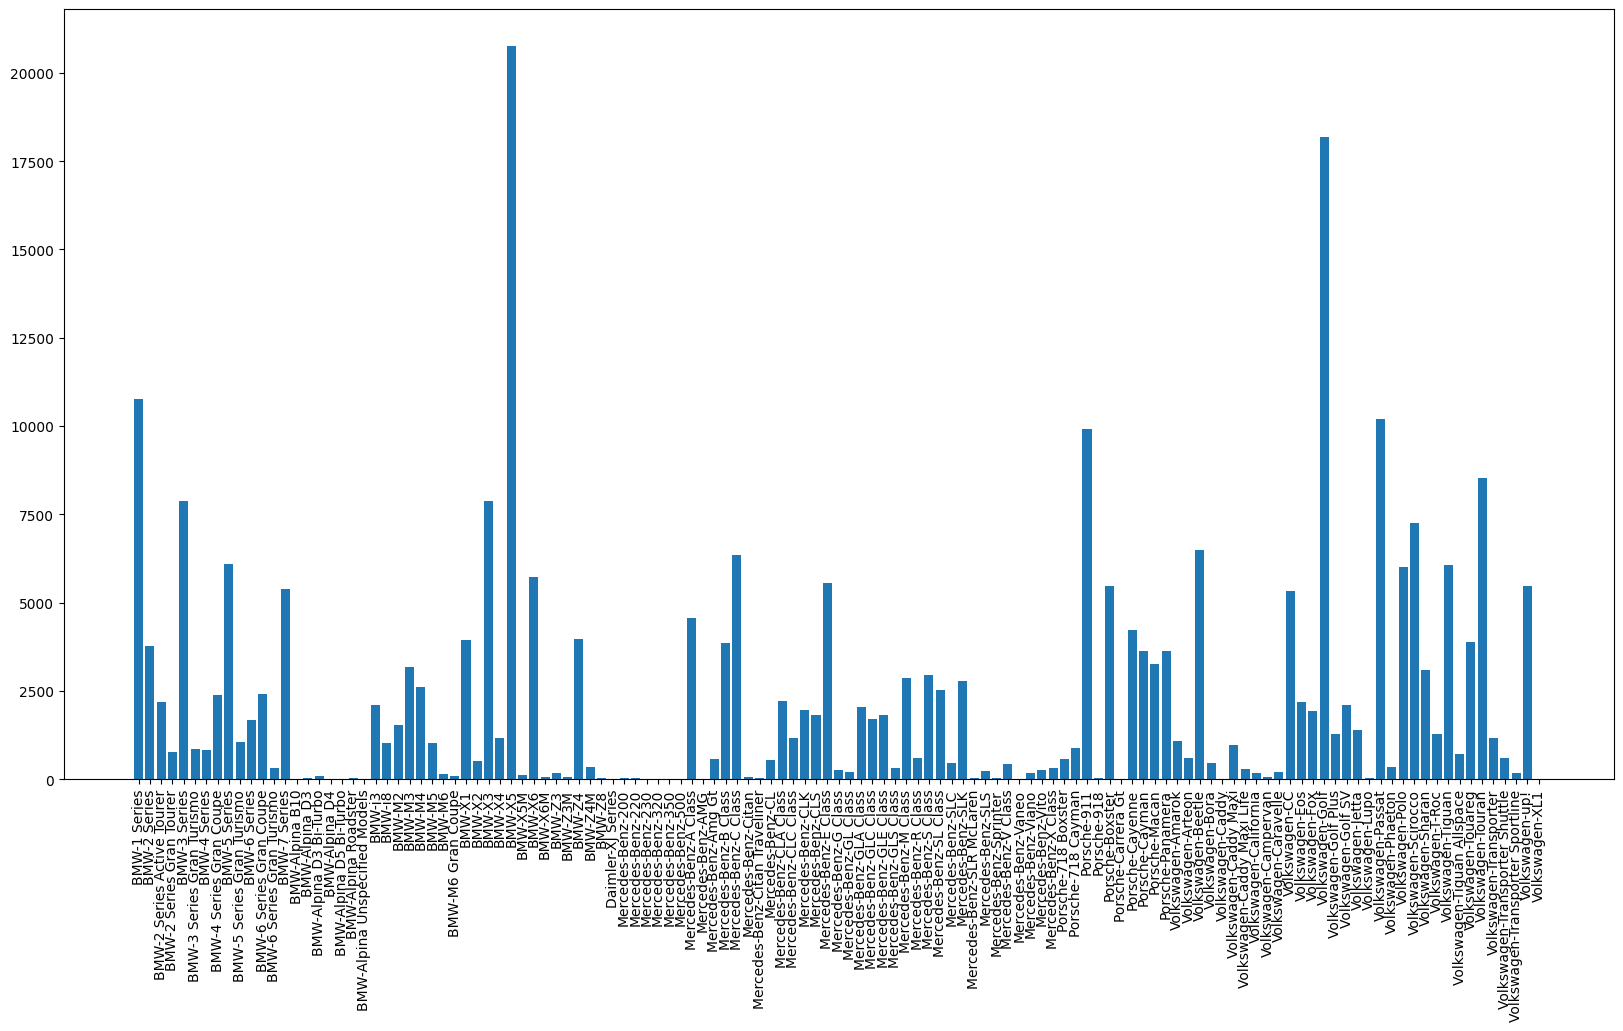

In [18]:
plt.figure(figsize=(20, 10))
plt.bar(data["model"], data["count"])
plt.xticks(rotation=90)

plt.show()

In [27]:
filtered_models = []
filtered_count = []
for index in range(len(data["count"])):
    if data["count"][index] > 1000:
        filtered_models.append(data["model"][index])
        filtered_count.append(data["count"][index])

plt.figure(figsize=(20, 10))
plt.bar(filtered_models, data["count"])
plt.xticks(rotation=90)

plt.show()